In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_33696\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[630]

Unnamed: 0                          630.000000
EPIC ID                       202135853.000000
Teff                               3466.717300
logg                                  4.002100
Flare #                               7.000000
Observation time                     36.266213
Average flare duration                0.099240
Longest flare duration                0.122591
Shortest flare duration               0.081727
Average percentage increase          22.284130
Highest percentage increase         150.572348
Lowest percentage increase            0.643766
Name: 630, dtype: float64

In [4]:
flc = from_mast("202135853", mode="LC", mission="K2")

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

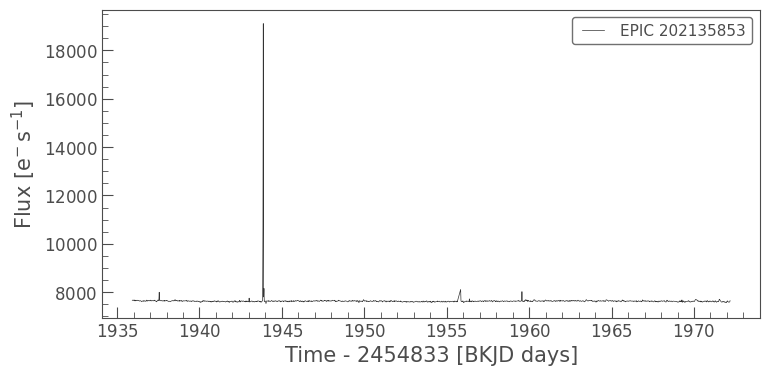

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

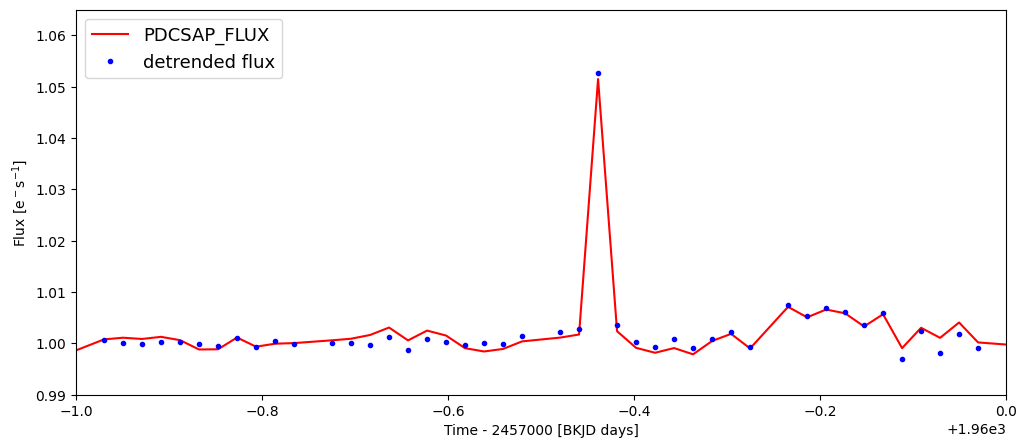

In [21]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(1959, 1960)
plt.ylim(.99,1.065)
plt.legend(loc=2,fontsize=13);

In [9]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,366,371,89798,89803,1943.828961,1943.931120,3552.7141423356234,2.368638483784103,1.505723476409912,0.102158,1624.000000
1,1067,1071,90578,90582,1959.765637,1959.847364,45.19824764976762,3.3913112396288265,0.007358670234680176,0.081727,1624.000000
2,1088,1094,90602,90608,1960.255998,1960.378588,75.82089917243783,4.100844721401272,0.00861978530883789,0.122590,1624.000000
3,1230,1234,90758,90762,1963.443342,1963.525069,42.126947537609716,3.337081365820606,0.00812065601348877,0.081727,1624.000000
4,1285,1289,90818,90822,1964.669245,1964.750972,39.039406248546534,3.4013136279185923,0.00643765926361084,0.081727,1624.000000
5,1526,1532,91083,91089,1970.083660,1970.206251,88.30752137837392,4.165337534579205,0.01032257080078125,0.122591,1624.000000
6,1592,1597,91154,91159,1971.534318,1971.636477,78.55786160760898,3.5689746238963416,0.013306260108947754,0.102159,1624.000000


In [8]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 1 candidate(s) in the (0,894) gap.
Found 6 candidate(s) in the (894,1624) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
